In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import FinanceDataReader as fdr
import os, csv

# Problem Scenarios


 이제 막 사회 초년생이 된 김철수 씨는 매월 월급에서 100만원을 투자할 계획을 가지고 있다. 하지만 그가 어줍잖게 들은 금융지식에 의하면, 계란은 한 바구니에 담지 않는게 좋다고 한다.
 김철수 씨가 고려할 수 있는 옵션이 금, 국내 주식, 달러 보유, 미국 주식의 4가지 옵션만이 존재한다고 가정했을 때 이득을 최대로 하는 모델을 구하려고 한다.

 추가적으로 자금 대비 최소 비중이 손실율 혹은 이익율에 어떠한 영향을 미치는 지에 대해서도 구해보자.


 ## Assumption

- 금 구매 및 달러 환전은 즉시 이루어지며 이 때 발생하는 각종 수수료 및 세금은 계산하지 않는다. 
- 주식 거래의 트랜잭션 또한 즉시 이루어진다라고 가정한다.
- 주식 거래의 거래 대상은 코스피 200 및 S&P 500을 대상으로만 한다.
- 미국 주식의 거래의 구매 및 판매는 달러 보유에서 차감되거나 증가한다.
- 시중 예금 금리의 기준은 기준 금리의 + 1.5%로 가정함.
- 매월 들어오는 돈 100만원은 해당 월의 첫 영업일에 예금으로 들어온다고 가정함.

## Problem Definition

- Training data : 2004-01-01 ~ 2021-12-31 까지의 데이터
- Test data : 2022-01-01 ~ 2022-10-31 까지의 데이터
- Target : 
  - 금 가격(g : 금 무게 (g), $G_p$ : g 당 가격 예측, $G_t$ : g 당 실제 가격)
  - 국내 주식 가격($S_p$ : 예측 가격, $S_t$ 실제 가격, $c_s$ : 보유량)
  - 달러($D_p$ : 예측 환율, $D_t$ : 실제 환율 $c_\delta$ : 보유량)
  - 미국 주식 가격($U_p$ : 예측 가격, $U_t$ : 실제 가격, $c_u$ : 보유량)
- Objective : 
  - Input : features when time $\tau-1$
  - Target : target features when time $\tau$
  - objective function :
> $\argmax_{g_{\tau}, c_{\delta,\tau}, c_{u, \tau}, c_{s,\tau}} \{(G_{p,\tau}-G_{t,\tau})g_\tau+(B_{p,\tau}-B_{t,\tau})c_{s,\tau}+(C_{p,\tau}-C_{t,\tau})c_{\delta,\tau} + (D_{p,\tau}-D_{t,\tau})c_{\epsilon,\tau}\}$

# Data Source

- FinanceDataReader : Python Library로 국내외 주식, 환율, 채권 및 연준 데이터를 제공하는 Crawling Library 

# Crawling

1. target feature
2. 

In [2]:
start = '2012-01-01'

### Target Features

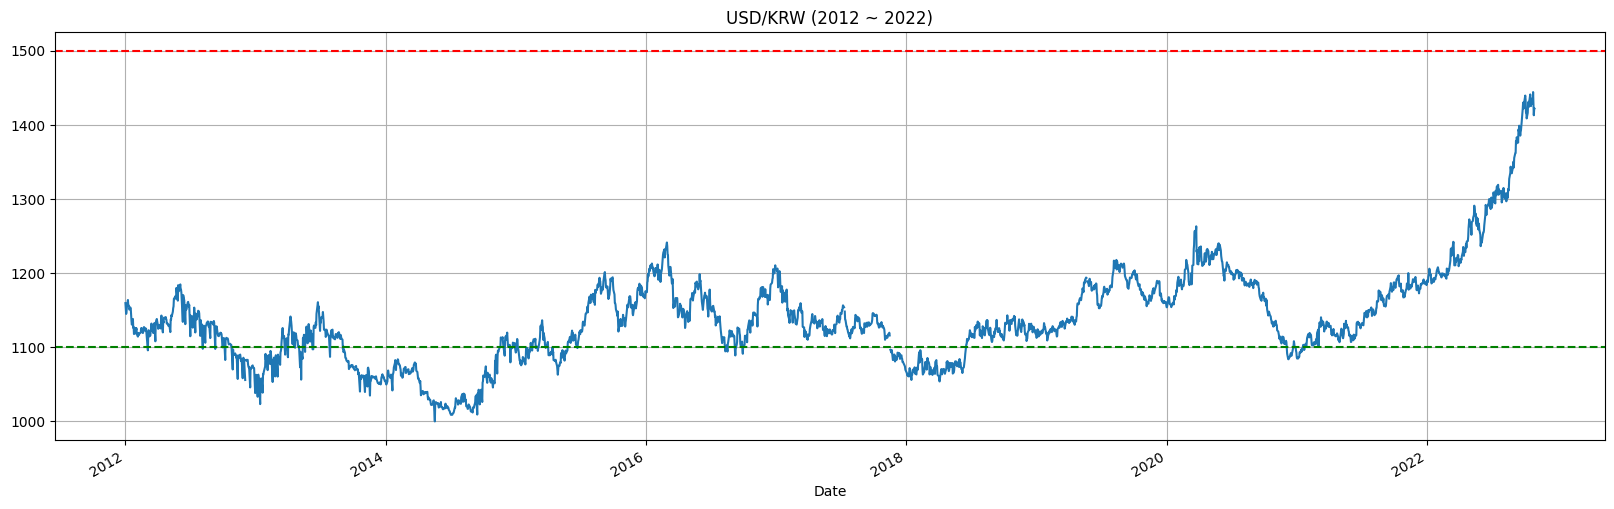

In [6]:
#1 target exchange rate

USD_KRW = fdr.DataReader('USD/KRW', start=start)

plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.unicode_minus'] = False
graph = USD_KRW.loc[:,'Close'].plot();
graph.axhline(1500, ls='--', color='r'); # 1500
graph.axhline(1100, ls='--', color='g'); # 1100
graph.set_title('USD/KRW (2012 ~ 2022)');

Text(0.5, 1.0, 'KOSPI (2012 ~ 2022)')

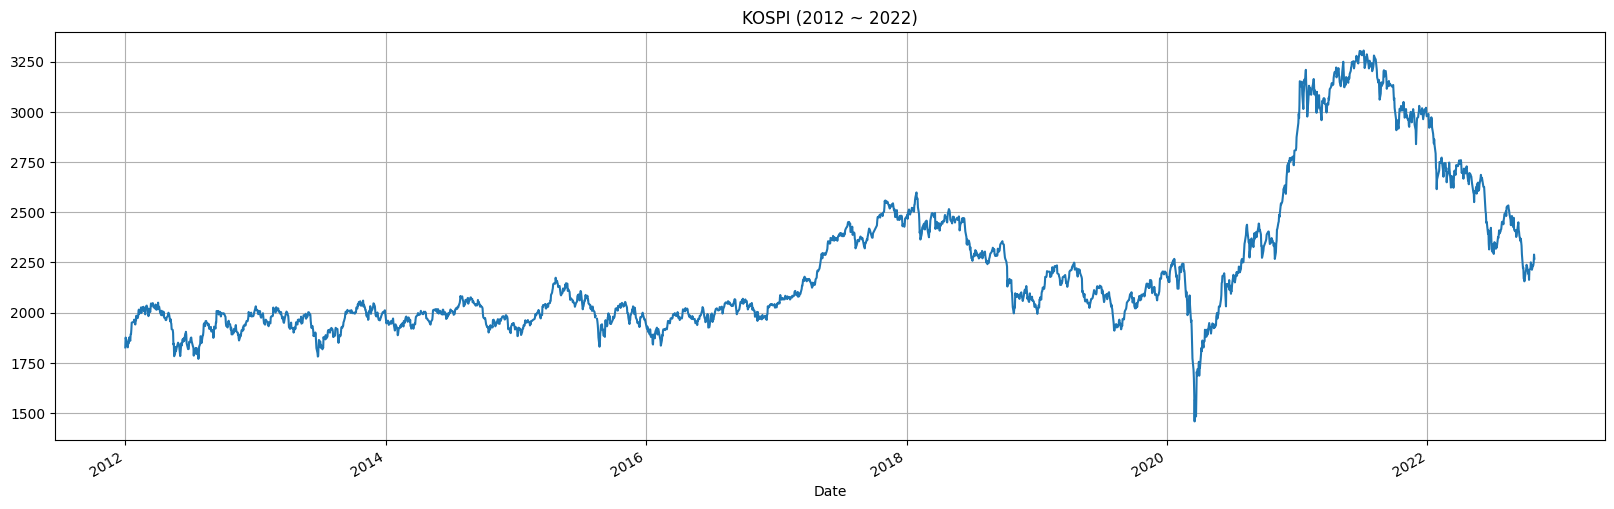

In [5]:
#2 KOSPI

KOSPI = fdr.DataReader('KS11', start=start)
graph = KOSPI.loc[:, 'Close'].plot()
graph.set_title("KOSPI (2012 ~ 2022)");

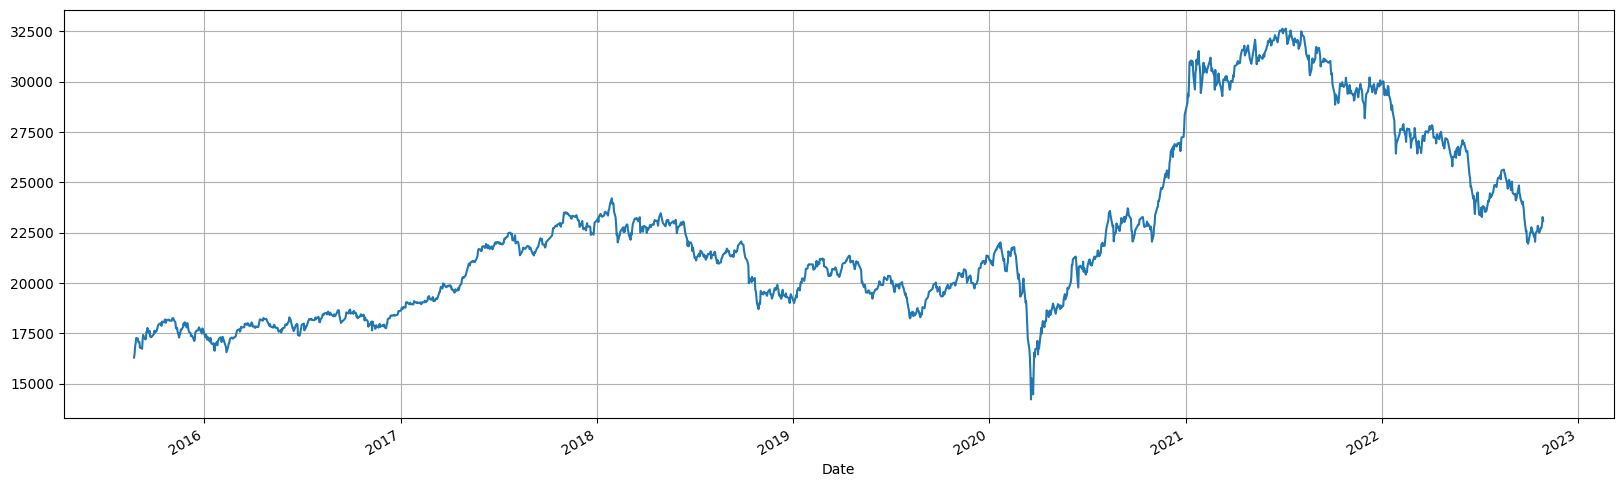

In [5]:
#2 KOSPI ETF (1) KODEX
KODEX = fdr.DataReader('226490', start=start)
graph = KODEX.loc[:, 'Close'].plot()

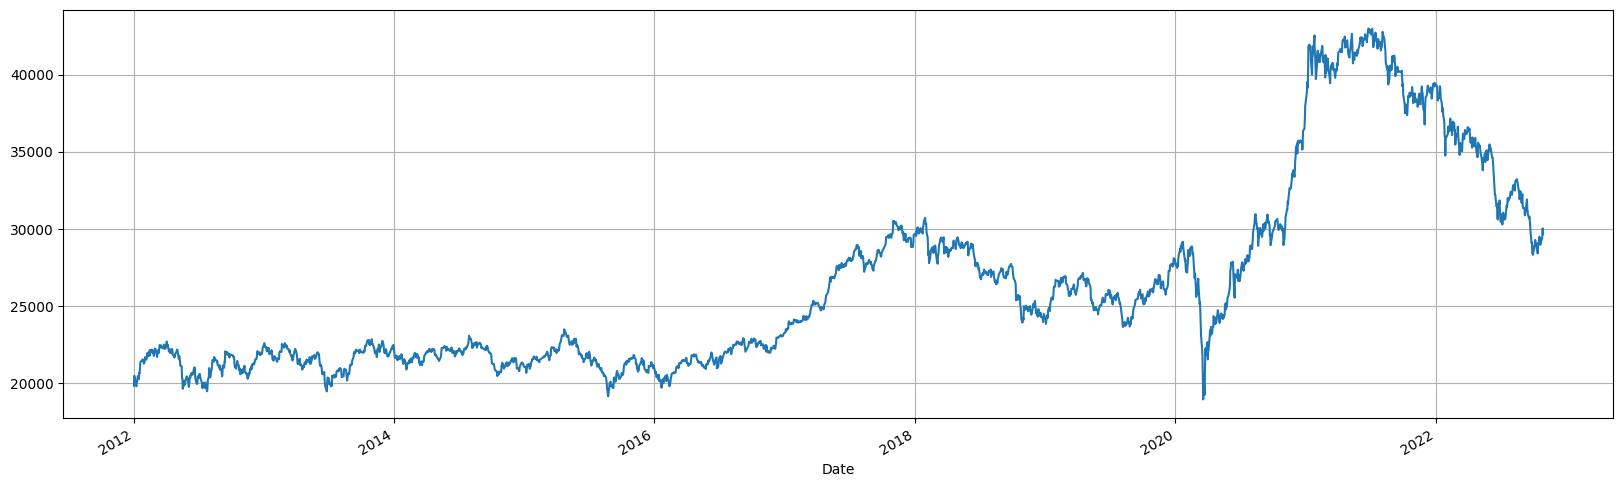

In [6]:
#2 KOSPI ETF (2) KBSTAR
KBSTAR = fdr.DataReader('148020', start=start)
graph = KBSTAR.loc[:, 'Close'].plot()

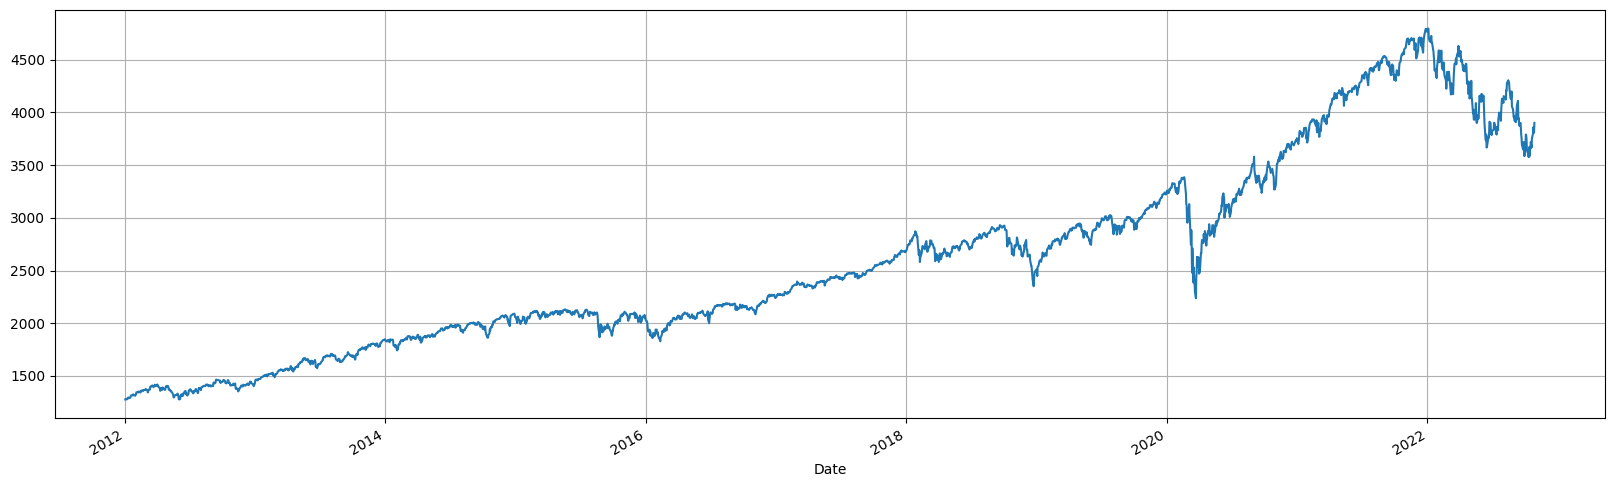

In [7]:
#3 s&p 500

SP500 = fdr.DataReader('US500', start=start)
graph = SP500.loc[:, 'Close'].plot()

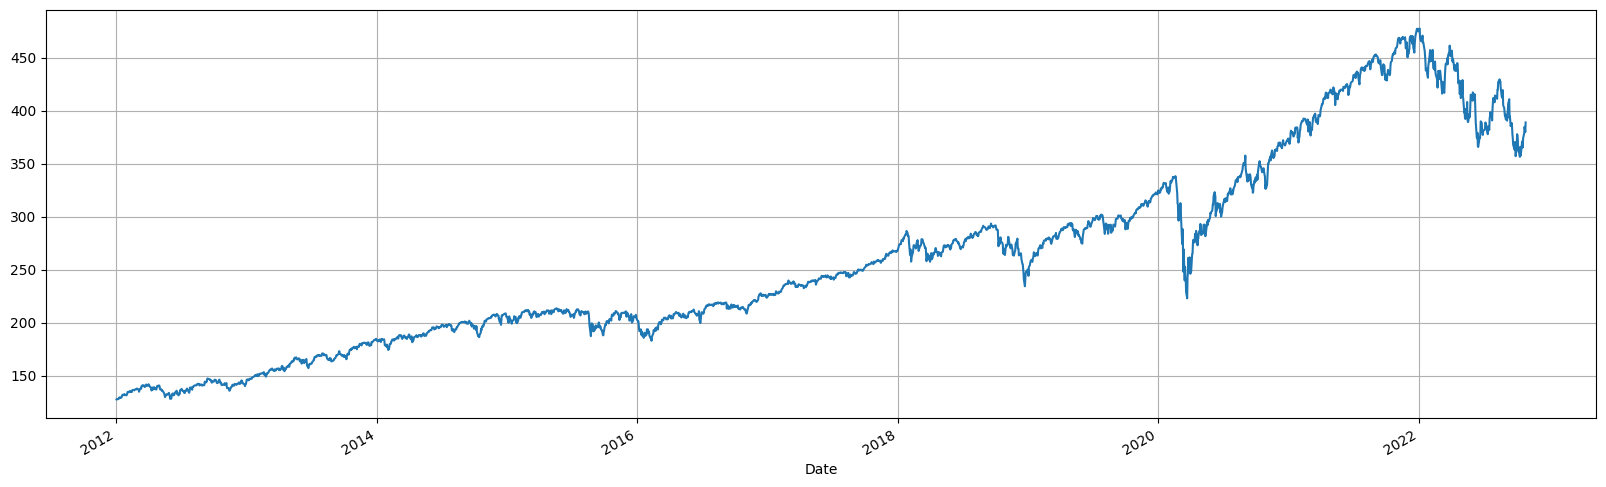

In [8]:
#3 S&P Trust ETF

SPY_ETF = fdr.DataReader("SPY", start=start)
graph = SPY_ETF.loc[:, 'Close'].plot()

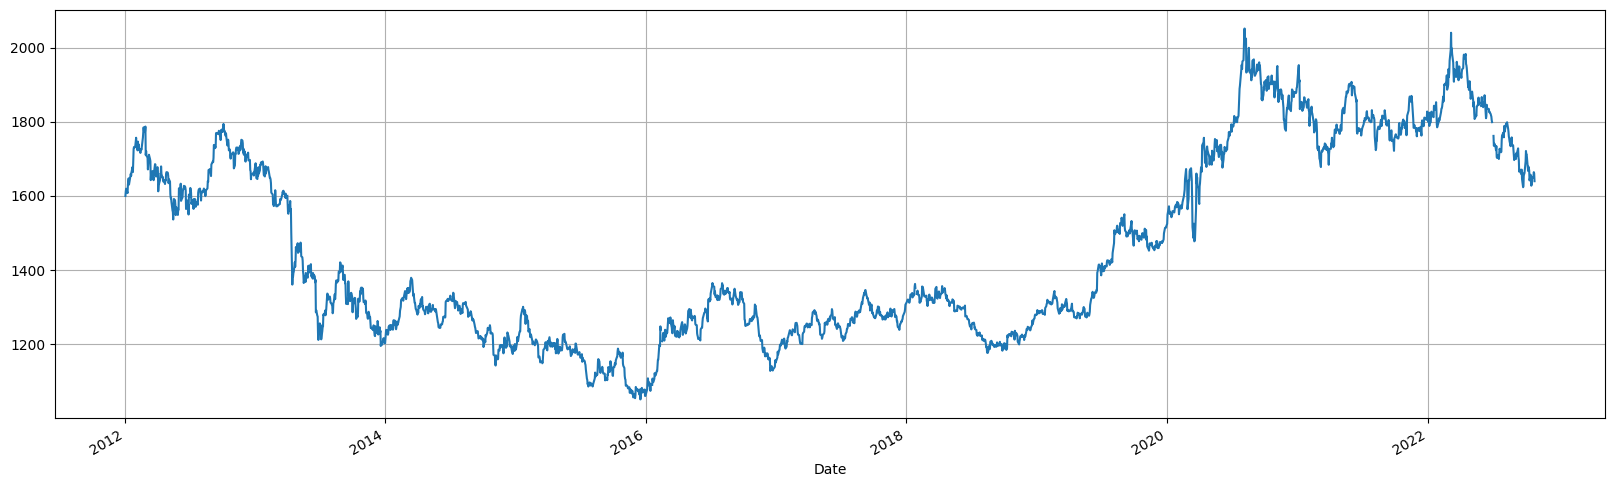

In [7]:
#5 gold
# 구매시 기준 가격의 105%로 판매, 판매 시 기준 가격의 95% 가격으로 구매
OZ = 31.1034768 # 국제 금 가격의 단위 31.~g = 1 oz
gold = fdr.DataReader("GC=F", start="2012-01-01")
graph = gold.loc[:, 'Close'].plot()

### Independent variables

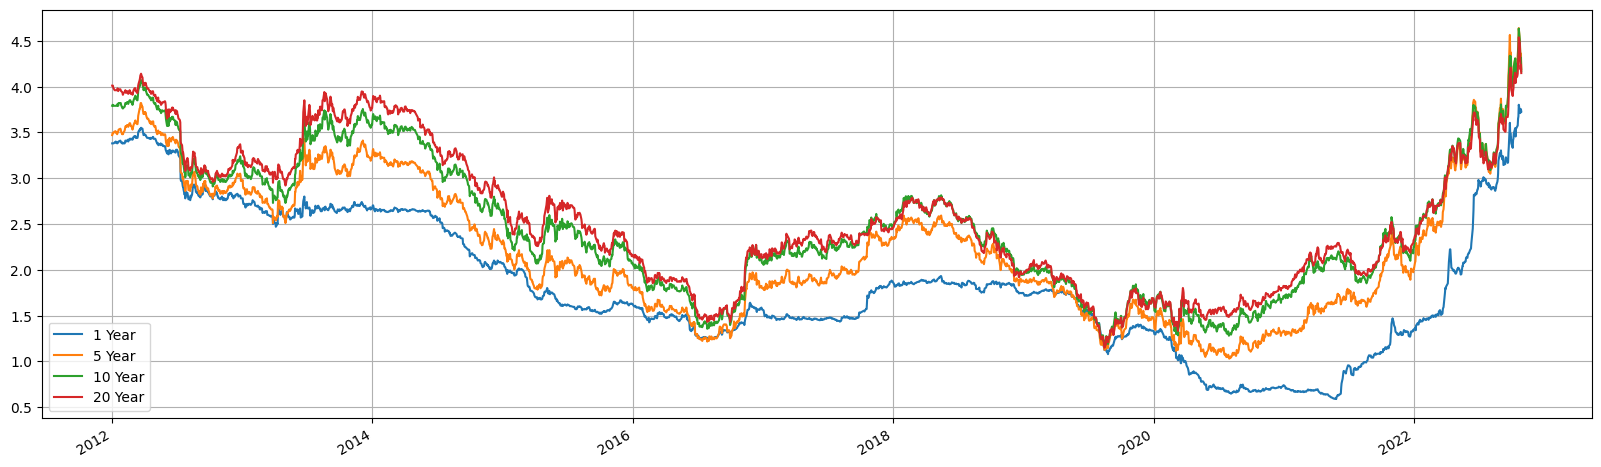

In [8]:
#0 한국 국채 금리 (20년, 10년, 5년, 1년)
from db.data import DataReader
import pandas as pd
kr_bond = DataReader.get_kr_bond()
graph = kr_bond.plot();

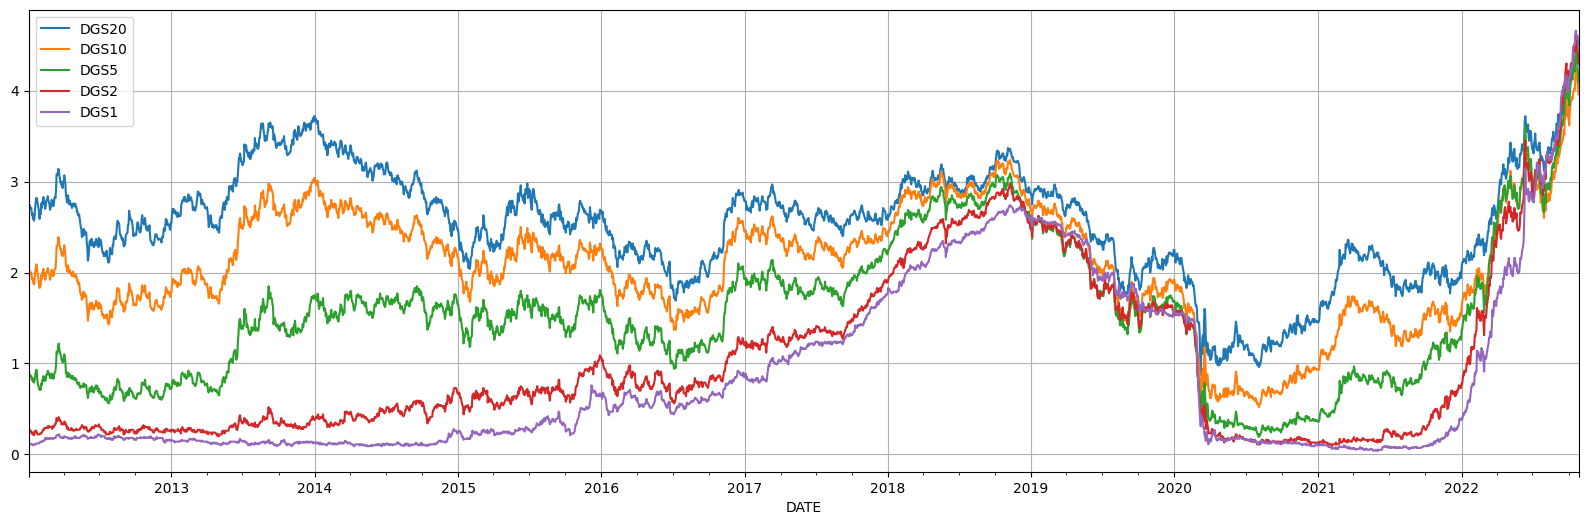

In [31]:
#1 미국 국채 금리 (20년, 10년, 5년, 1년)
DGS = fdr.DataReader('FRED:DGS20,DGS10,DGS5,DGS2,DGS1', start=start, data_source='FRED')
graph = DGS.plot()

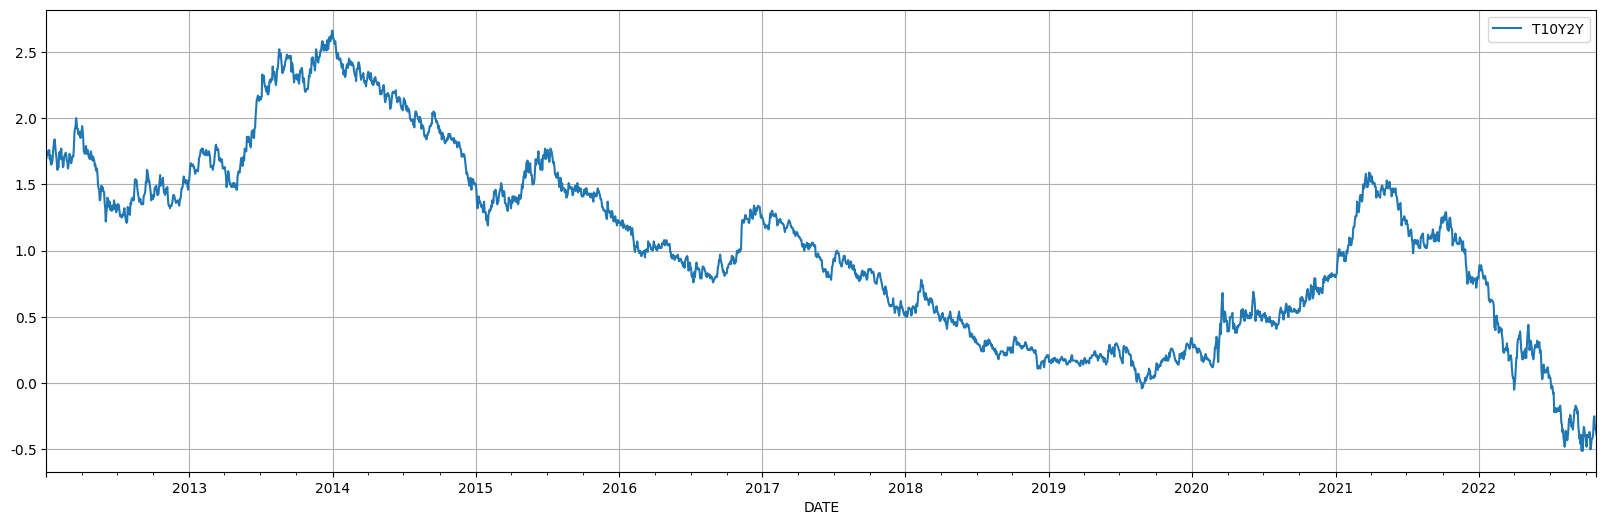

In [30]:
##미국 국채 금리 (10년 - 2년)
T10Y2Y = fdr.DataReader('FRED:T10Y2Y', start=start, data_source='fred')
graph = T10Y2Y.plot()

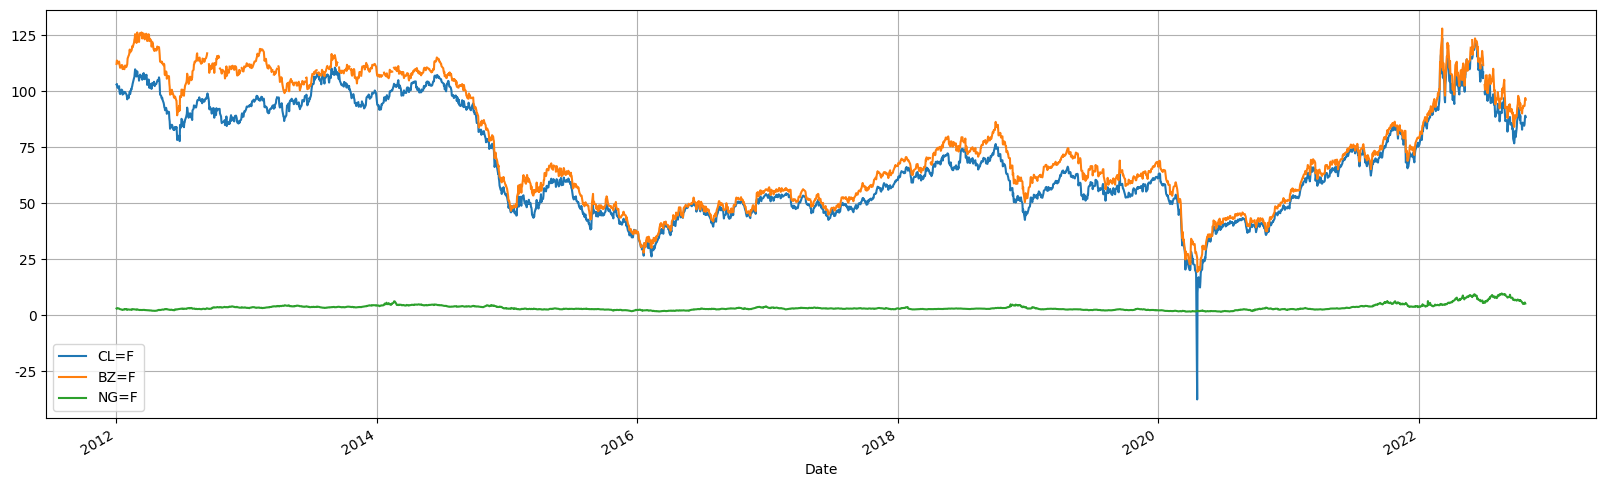

In [37]:
# 원유 가격 (WTI 유)
OIL = fdr.DataReader('CL=F,BZ=F,NG=F', start=start)
graph = OIL.plot()

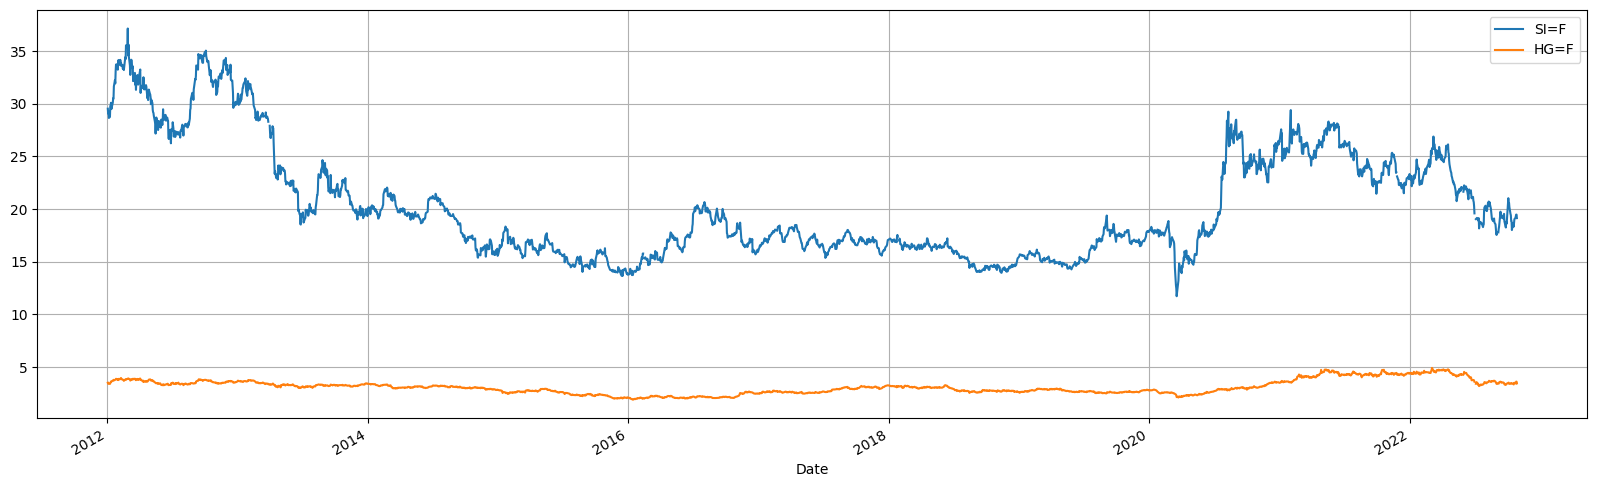

In [9]:
# 원자재
MAT = fdr.DataReader('SI=F,HG=F', start=start)
graph = MAT.plot()

Text(2019-12, 70, 'Pandemic')

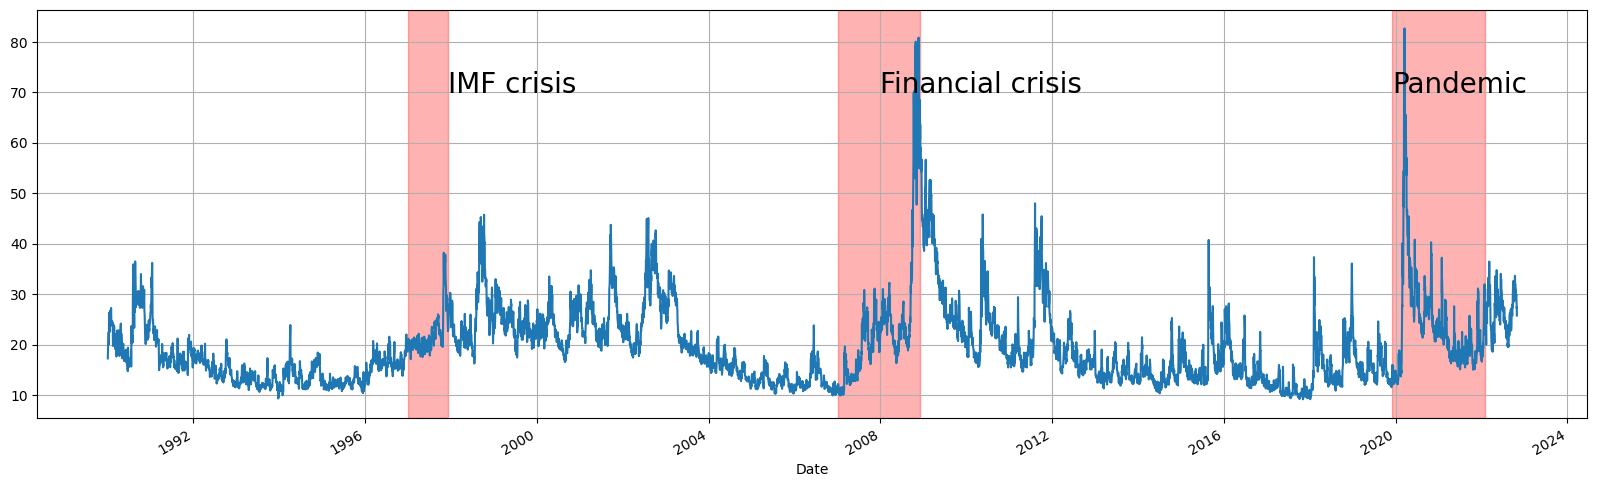

In [12]:
# VIX 지수
"""
#https://nbviewer.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20VIX%20%EC%A7%80%EC%88%98%EC%99%80%20%EA%B4%80%EB%A0%A8%20%EC%A2%85%EB%AA%A9.ipynb

VIX지수

VIX지수(Volatility Index)는 S&P 500지수 옵션 가격에 대한 향후 30일 동안의 투자 기대치를 지수화 한 것입니다. 시카고 옵션거래소(CBOE)에서 제공하고 있어 CBOE VIX라고 표기하기도 합니다.

주식시장의 변동성이 커지면 위험을 헤지하기 위해 옵션에 대한 수요가 증가하게 되어 옵션의 가격(프리미엄)이 높아집니다. 즉, VIX가 오르게 됩니다. VIX 지수가 높다는 것은 곧 시장 참여자들의 시장에 대한 불안감이 크다는 것을 의미합니다. 이 때문에 VIX를 '공포지수'라고도 부르기도 합니다.

VIX는 단기적으로 증권 시장의 지수(예를 들어, S&P 500 지수)와 반대로 움직이는 특징이 있습니다.

VIX가 30(%)이라고 하면 앞으로 한 달간 주가가 30%의 등락을 할 것이라고 예상하는 투자자들이 많다는 것을 의미합니다. 보통 VIX는 보통 30을 기준으로 30보다 높으면 변동성이 높다고 하고, 20 이하면 변동성이 낮다고 합니다.

"""
VIX = fdr.DataReader('VIX')
graph = VIX.loc[:,'Close'].plot()

# 외환위기
graph.axvspan('1997-01', '1997-12', alpha=0.3, color='red') 
graph.annotate('IMF crisis', xy=('1997-12-03', 70), fontsize=20)

# 금융위기
graph.axvspan('2007-01', '2008-12', alpha=0.3, color='red') 
graph.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 

# 팬데믹
graph.axvspan('2019-12', '2022-02', alpha=0.3, color='red') 
graph.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 


In [16]:
vix = fdr.DataReader('VIX', '2010-01-01')
kospi = fdr.DataReader('KS11', '2010-01-01') # KOSPI index
sp500 = fdr.DataReader('US500', '2010-01-01') # S&P 500 index
df = pd.concat([vix['Close'], kospi['Close'], sp500['Close']], axis=1)
df.columns = ['VIX', 'KOSPI', 'S&P500']

<AxesSubplot: xlabel='Date'>

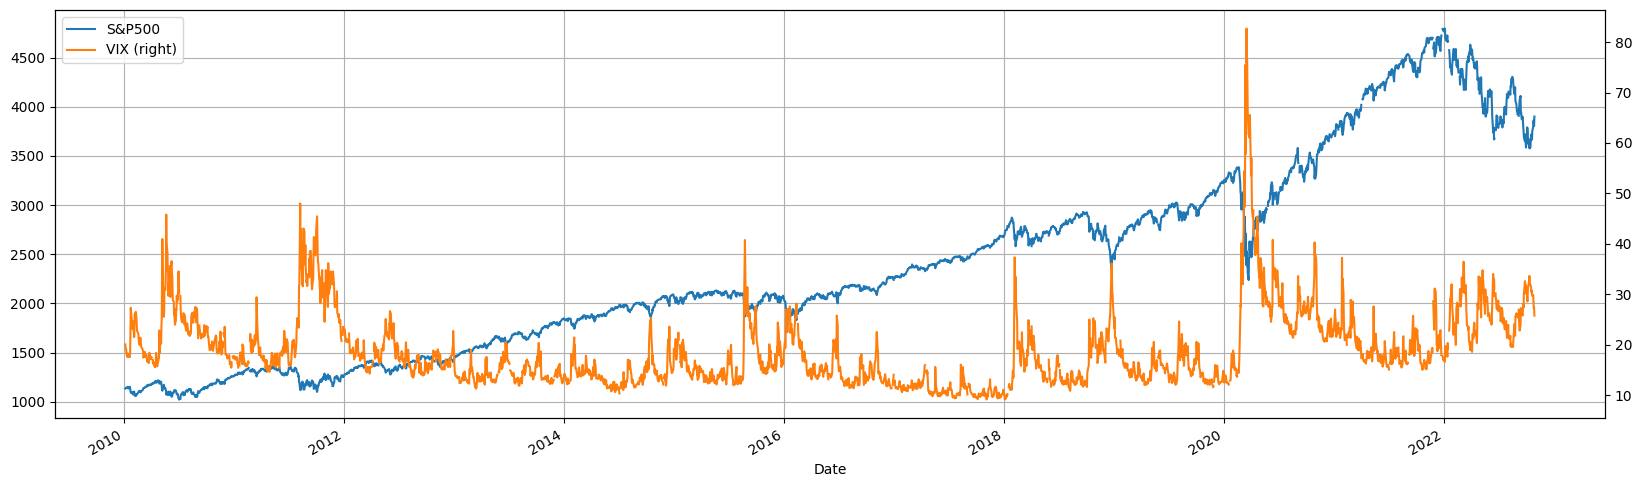

In [17]:
# S&p 500 vs VIX
df[['S&P500', 'VIX']].plot(secondary_y='VIX')

<AxesSubplot: xlabel='Date'>

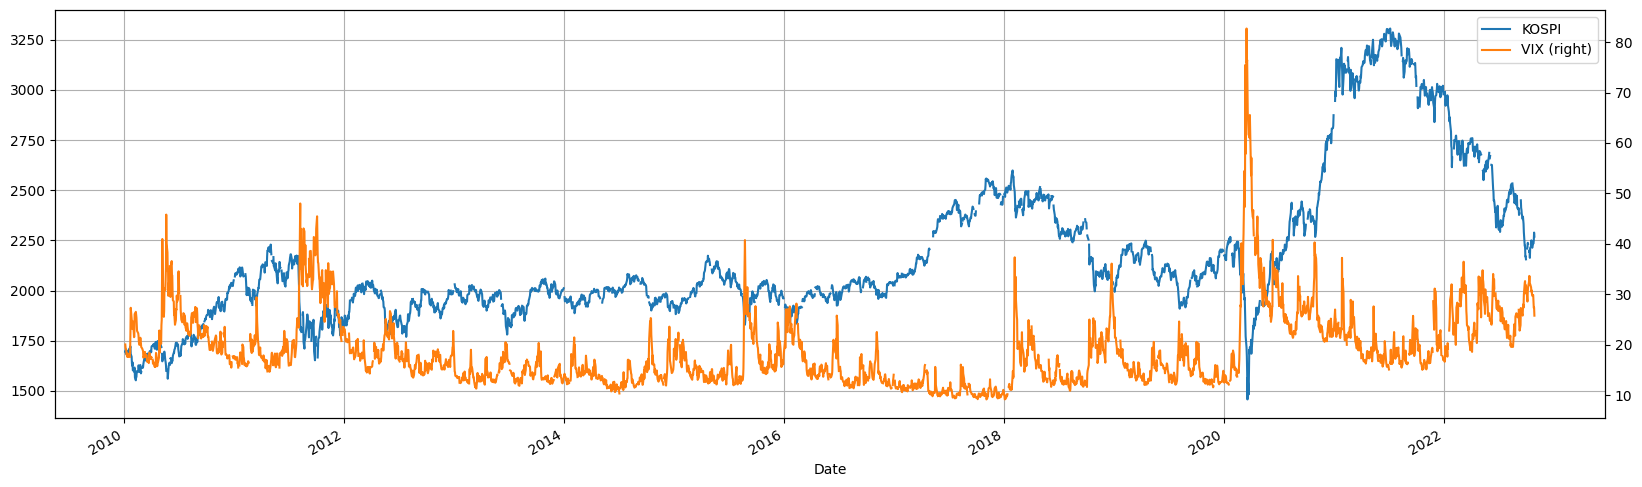

In [18]:
# KOSPI, VIX
df[['KOSPI', 'VIX']].plot(secondary_y='VIX')

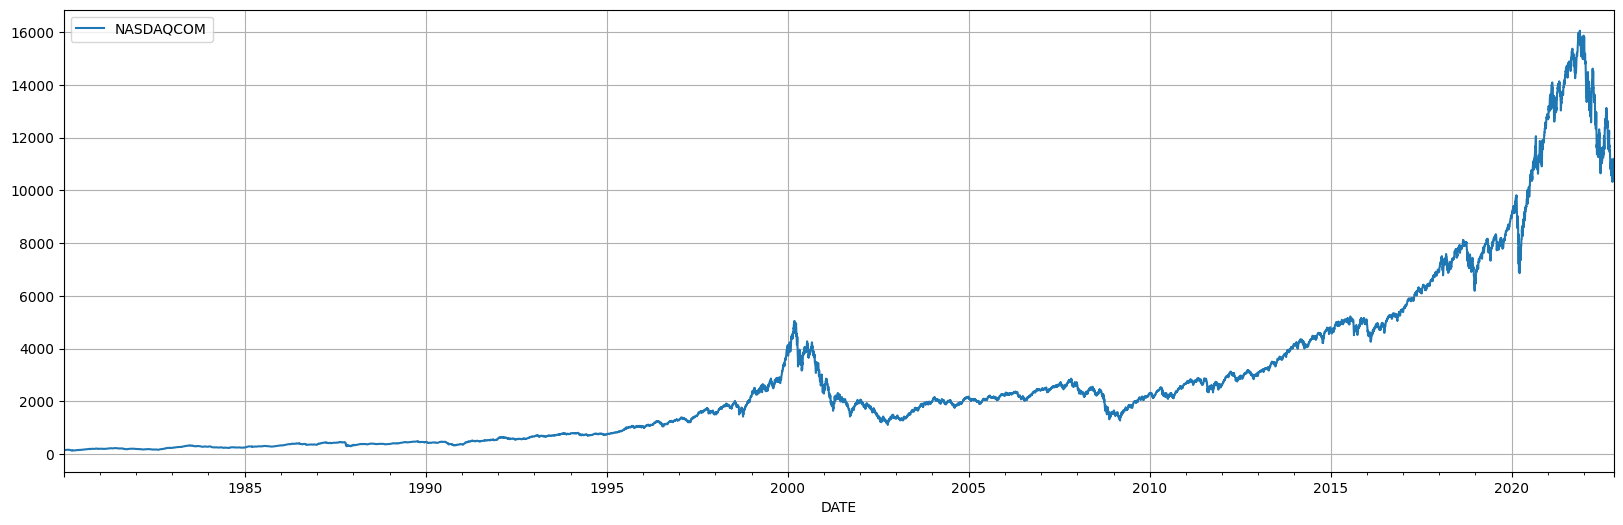

In [20]:
NASDAQCOM = fdr.DataReader('FRED:NASDAQCOM', data_source='fred')
graph = NASDAQCOM.plot()

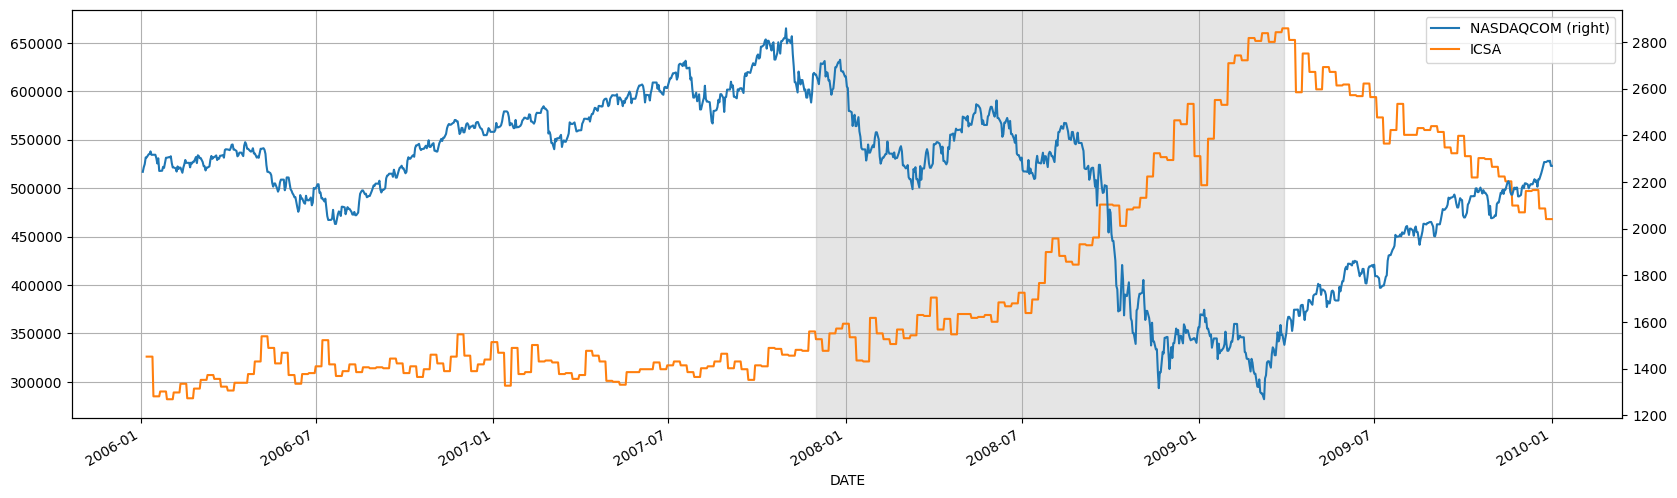

In [25]:
"""
1. 주간 실업수당 청구 건수 (ICSA)
https://fred.stlouisfed.org/series/ICSA

요즘 미국 경기를 이야기 할 때 뉴스에 가장 많이 등장하는 지표중의 하나입니다. 주단위 신규 실업수당청구 건수 입니다.

참고로 연속 실업수당청구 건수 CCSA도 있습니다.

경기가 나빠지는 경우는 후행지표로 동작하지만, 경기가 좋아지는 경우 선행 지표로 활용할 수 있습니다. 2008년 금융위기 때는 약간 후행하는 모습을 보이고 있습니다.
"""

# 주간 실업 수당 청구 건수

df = fdr.DataReader('FRED:NASDAQCOM,ICSA', start='2006', end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

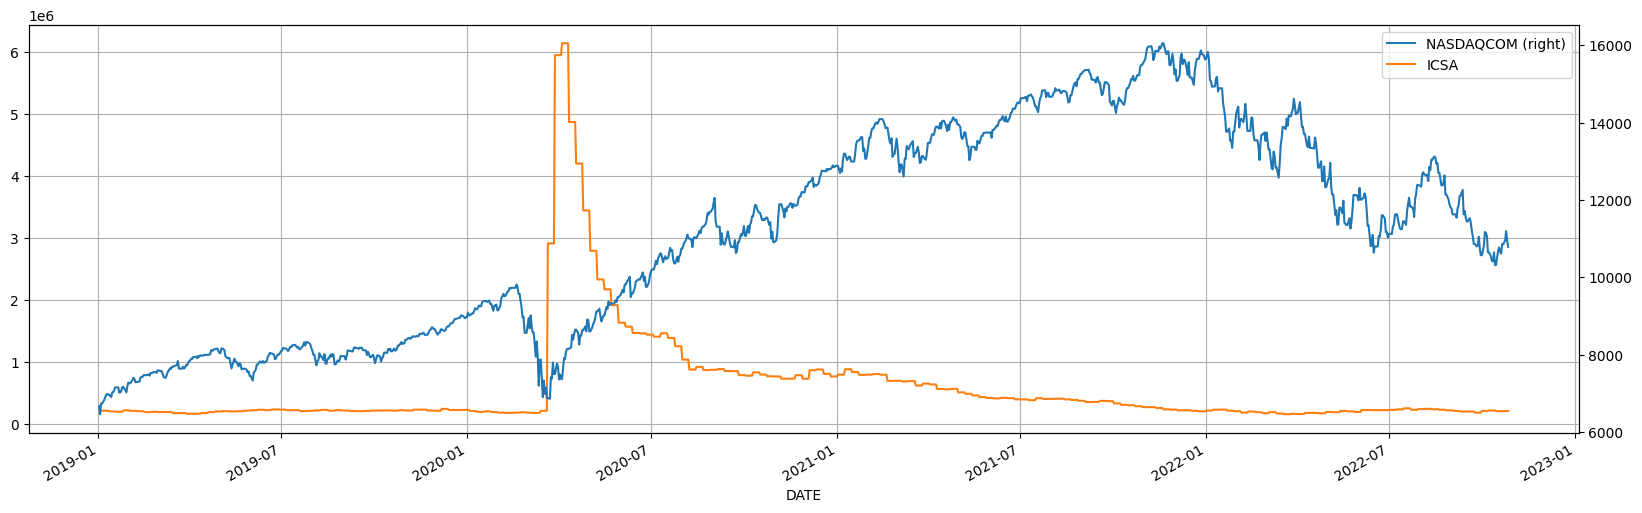

In [27]:
# 주간 실업 수당 청구 건수
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)
df = fdr.DataReader('FRED:NASDAQCOM,ICSA', start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

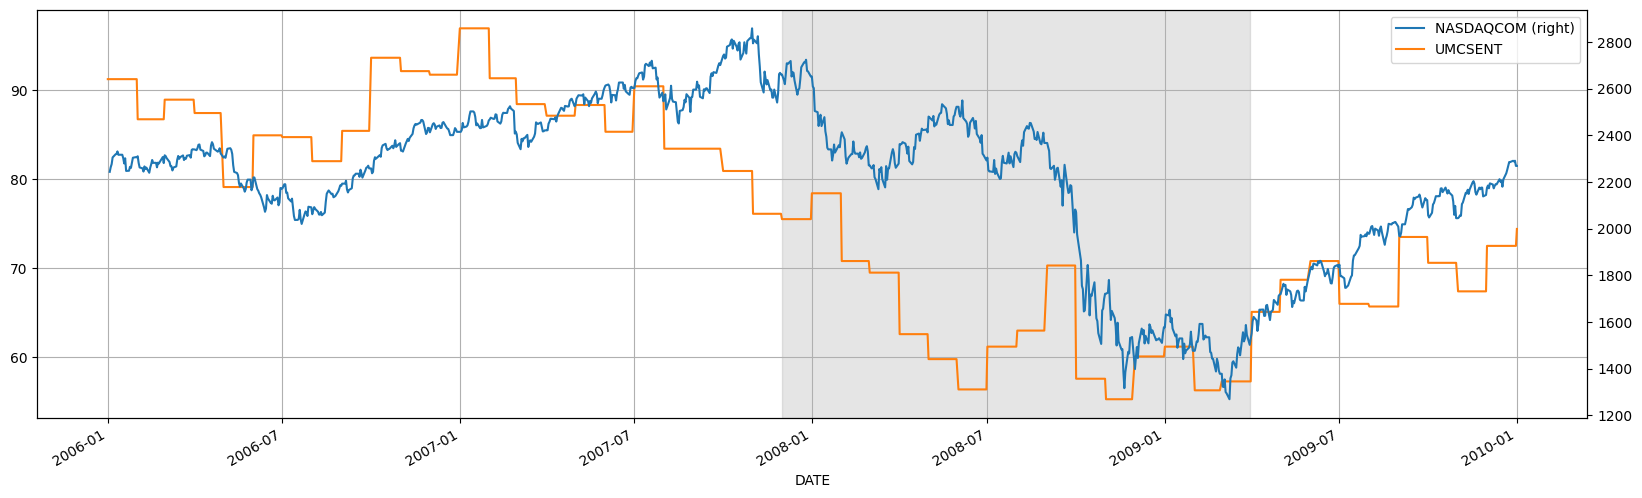

In [37]:
"""
2. 소비자심리지수 (UMCSENT)
https://fred.stlouisfed.org/series/UMCSENT

UMCSENT (University of Michigan: Consumer Sentiment)는 미시건대 소비자심리지수 추이로 소비자심리지수(CSI, Consumer Sentiment Index)는 소비자에 설문 결과를 수치화한 지표 입니다.

100을 기준으로 100이상이면 긍정적 100이하면 부정적으로 봅니다. 100이상이면 즉, 긍정적이면 소매업 유리하겠죠.

2008년 금융위기 주가 하락이 본격화 되기 전에 소비자심리지수(CSI)가 먼저 하락하는 것을 또렸하게 볼 수 있습니다.
"""

# 2008년 금융위기 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT)

df = fdr.DataReader('FRED:NASDAQCOM,UMCSENT', start='2006',
                    end='2010', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)


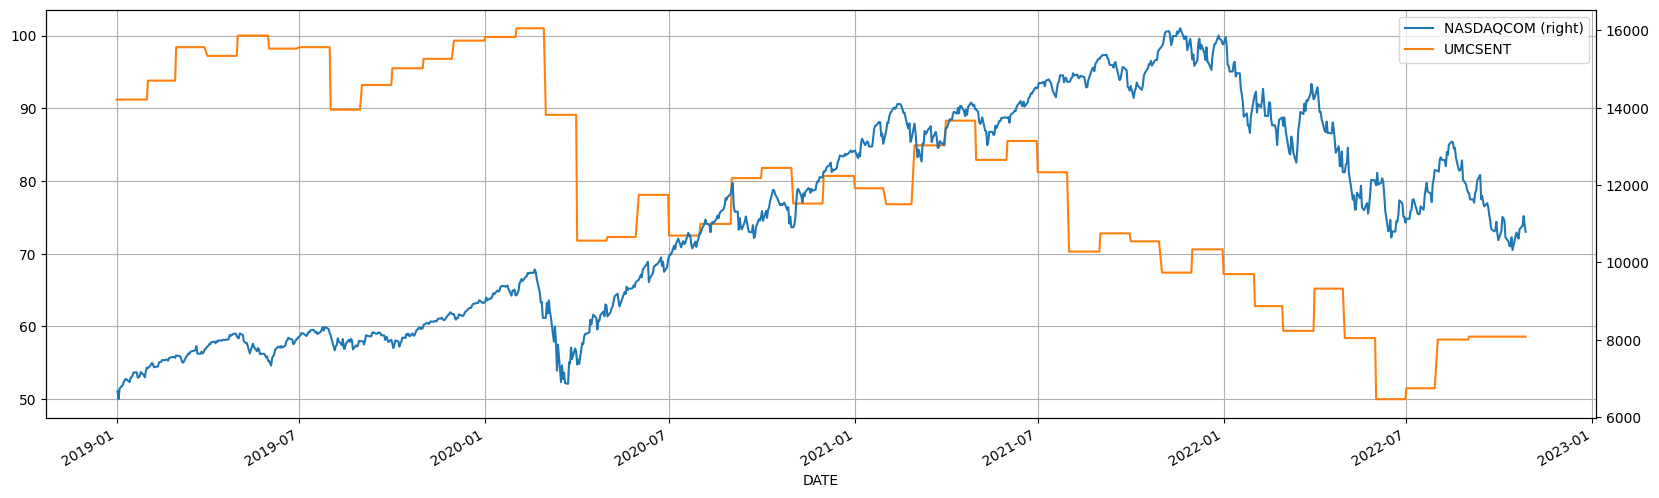

In [40]:
"""
현재 (2020년 10월초) 소비자심리지수(CSI)는 72 부근에서 회복되지 않고 있습니다.

소비자심리지수(CSI)는 경기에 대해 다소 부정적인 신호를 주고 있습니다.
"""

# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT)

df = fdr.DataReader('FRED:NASDAQCOM,UMCSENT', start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')


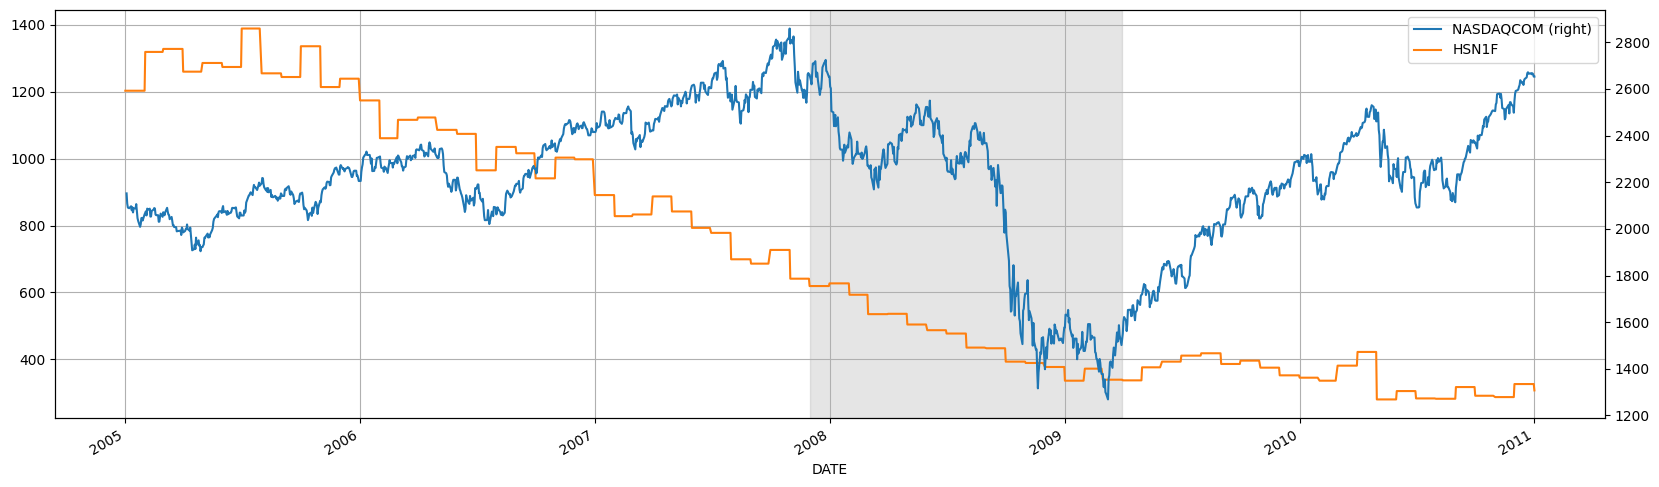

In [42]:
"""
3. 주택 판매 지수 (HSN1F)
https://fred.stlouisfed.org/series/HSN1F

주택 판매 지수는 주택시장 활성화 정도를 나타냅니다. 불황으로 주가가 하락할 때 하락에 앞서 주택 판매 지수가 하락하는 모습을 보입니다.
"""

# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주택 판매 지수

df = fdr.DataReader('FRED:NASDAQCOM,HSN1F', start='2005',
                    end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)


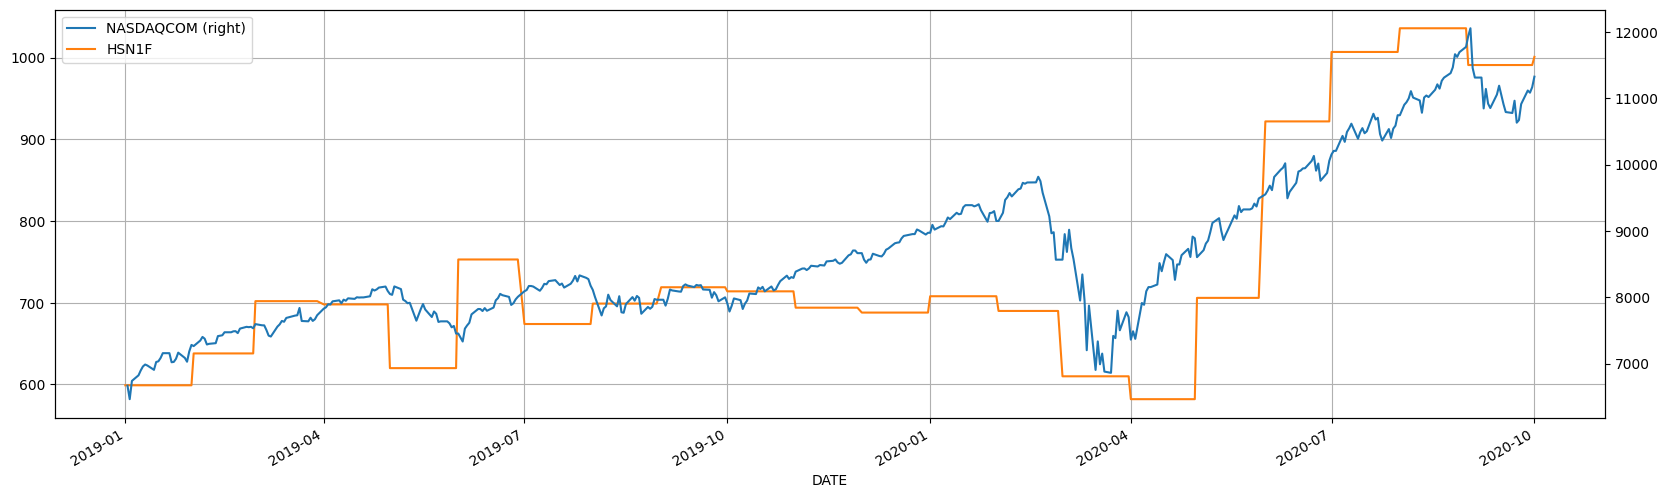

In [45]:
"""
최근 주택판매지수는 팬데믹 이후 반등하는 모습을 보이고 있습니다.
"""

# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 주택판매지수(HSN1F)

df = fdr.DataReader('FRED:NASDAQCOM,HSN1F', start='2019', end='2020-10', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')


In [ ]:
"""
4. 실업률 (UNRATE)
https://fred.stlouisfed.org/series/UNRATE

실업률은 불황에는 후행지표, 경기회복에 동행지표로 작동합니다.
"""


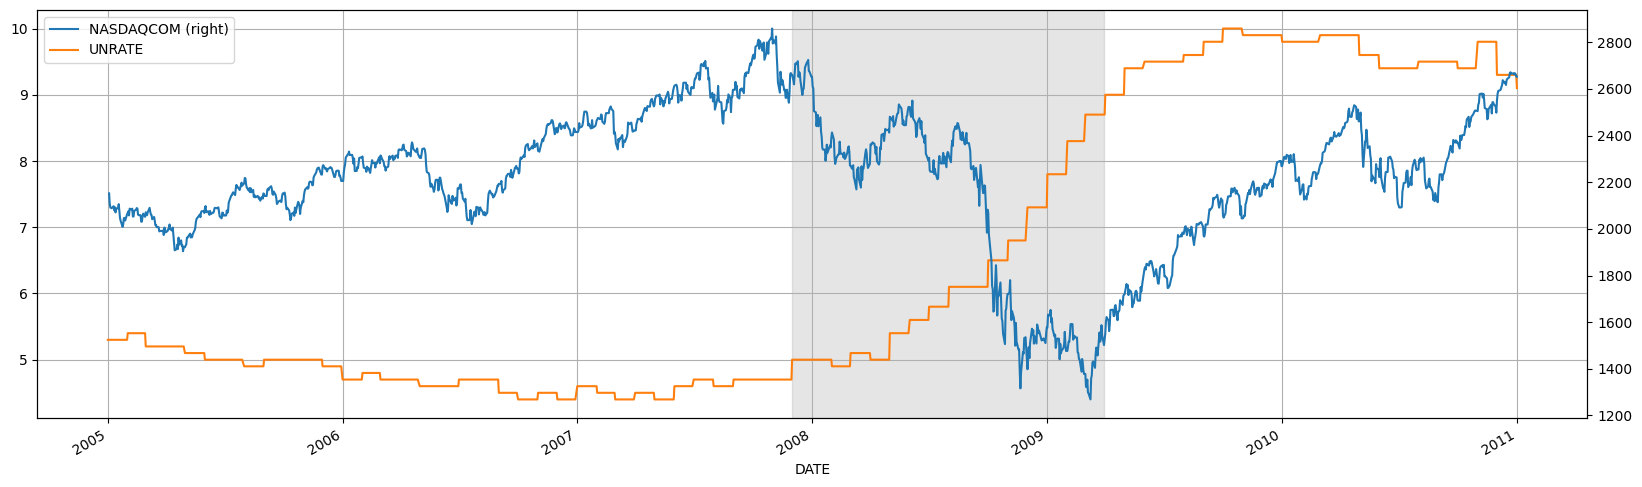

In [46]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 실업률(UNRATE)

df = fdr.DataReader('FRED:NASDAQCOM, UNRATE', start='2005',
                    end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)


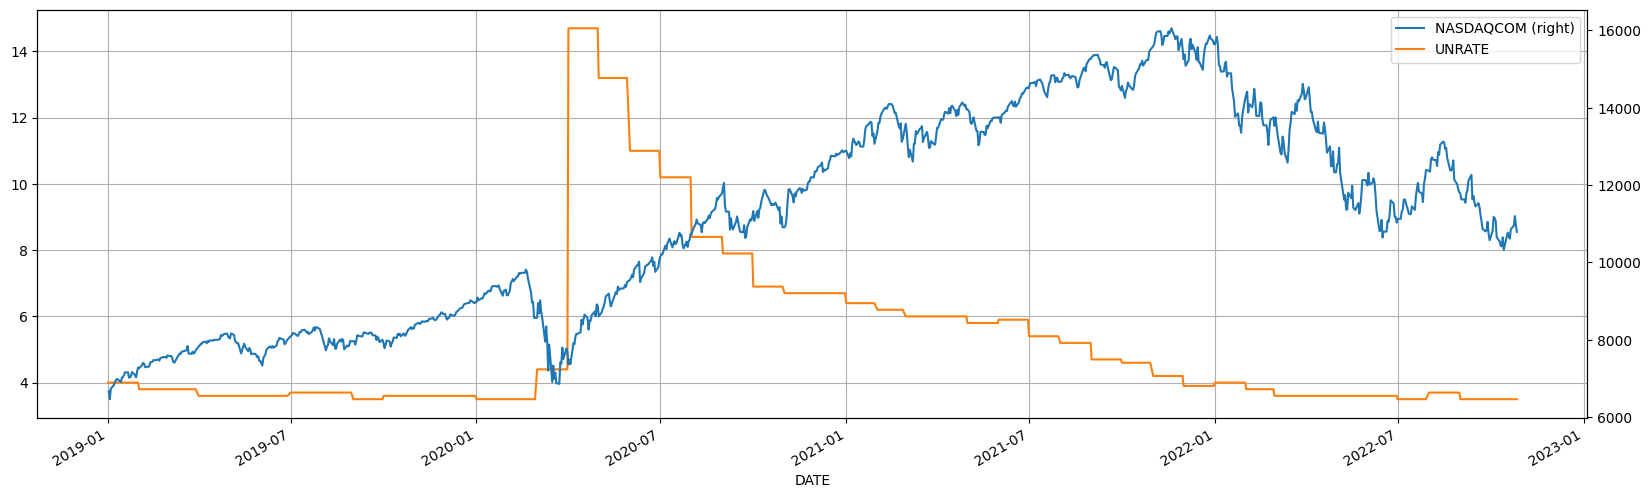

In [49]:
"""
실업률(UNRATE)은 팬데믹 이후 지속적으로 낮아지고 있습니다
"""

# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 실업률(UNRATE) 

df = fdr.DataReader('FRED:NASDAQCOM,UNRATE', start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

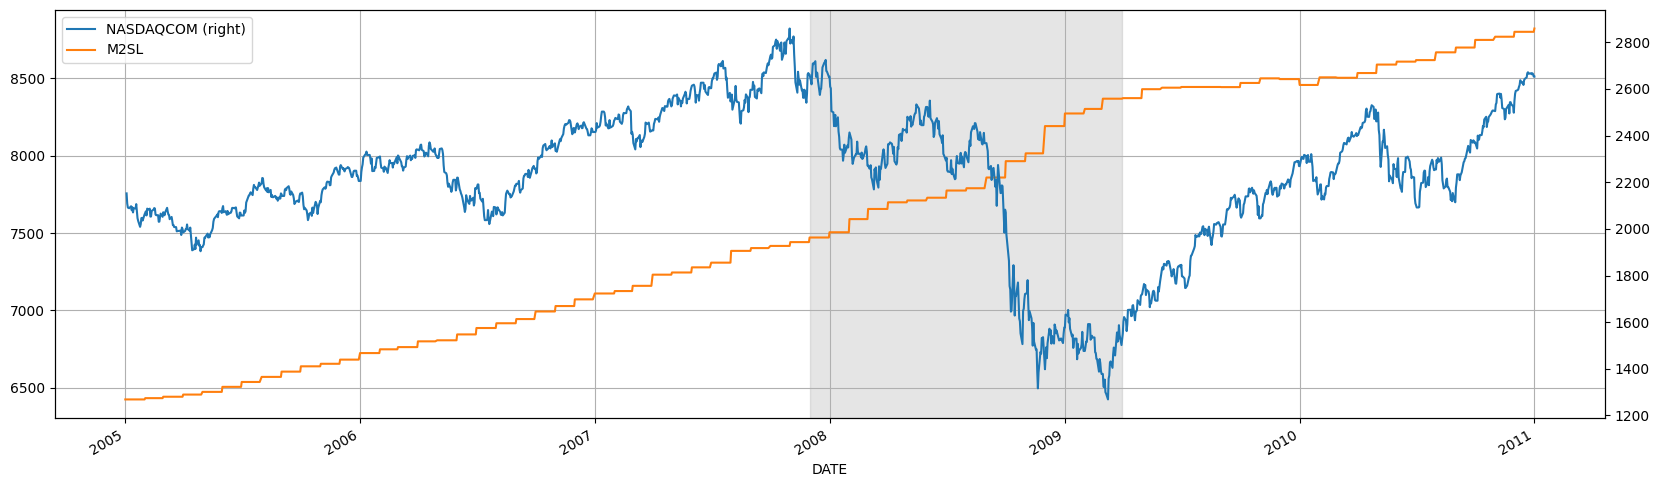

In [50]:
"""
5. M2 통화량(M2SL)
https://fred.stlouisfed.org/series/M2SL

M2 통화량은 시중 돈이 얼마나 많이 풀렸는지(유동성)을 보여주는 지표입니다.
"""
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 M2통화량(M2SL)

df = fdr.DataReader('FRED:NASDAQCOM,M2SL', start='2005',
                    end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)


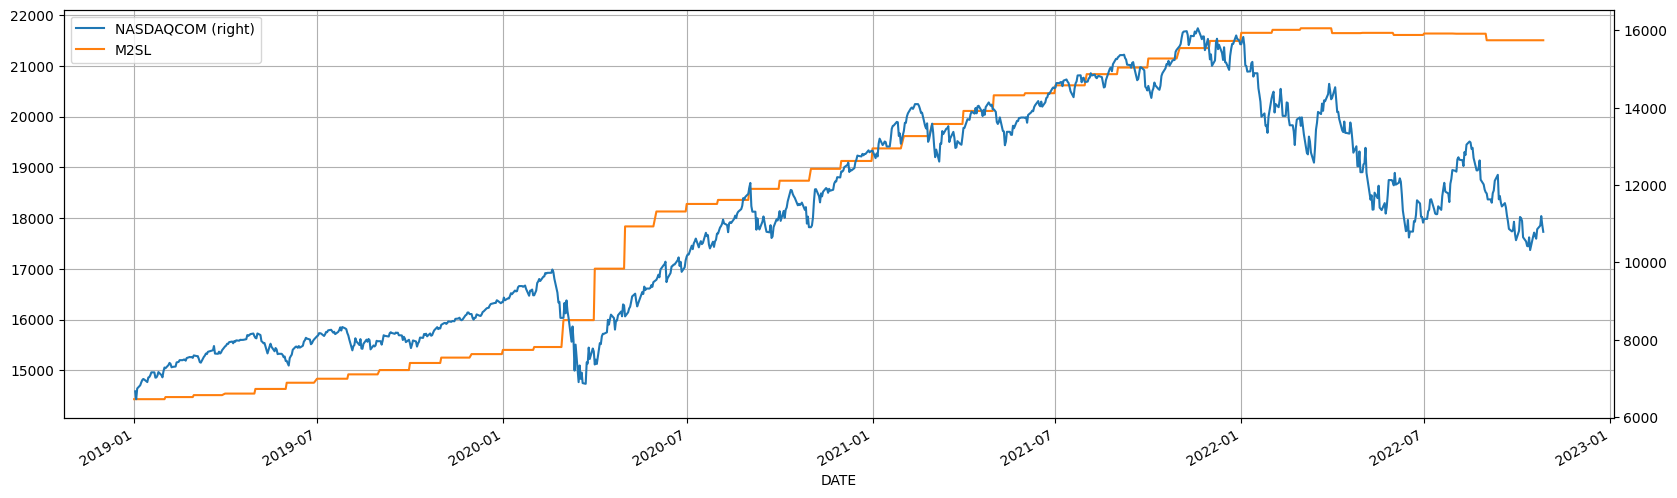

In [51]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 M2통화량(M2SL)

df = fdr.DataReader('FRED:NASDAQCOM,M2SL', start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')


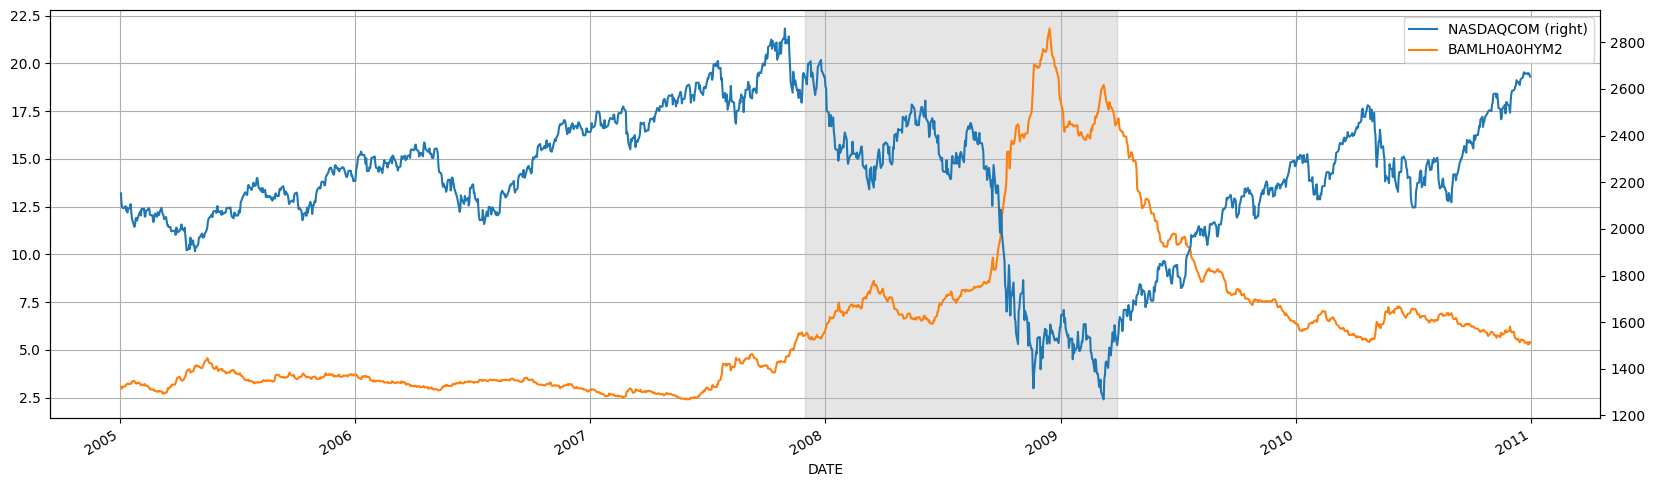

In [53]:
"""
6. 하이일드 채권 스프레드 (BAMLH0A0HYM2)
https://fred.stlouisfed.org/series/BAMLH0A0HYM2

하이일드 채권은 낮은 신용등급 회사에 투자하는 고위험,고수익 채권입니다. 여기서 스프레드는 국채 수익률과의 차이를 이야기합니다.

하이일드 채권 스프레드 = 하이일드 채권 수익률 - 국채 수익률

불황일 수록 하이일드 채권 스프레드는 더 커집니다.

FRED에서 'ICE BofA US High Yield Index Option-Adjusted Spread'라는 하이일드 채권 스프레드 데이터를 제공합니다.
"""
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드

df = fdr.DataReader('FRED:NASDAQCOM,BAMLH0A0HYM2',
                    start='2005', end='2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)


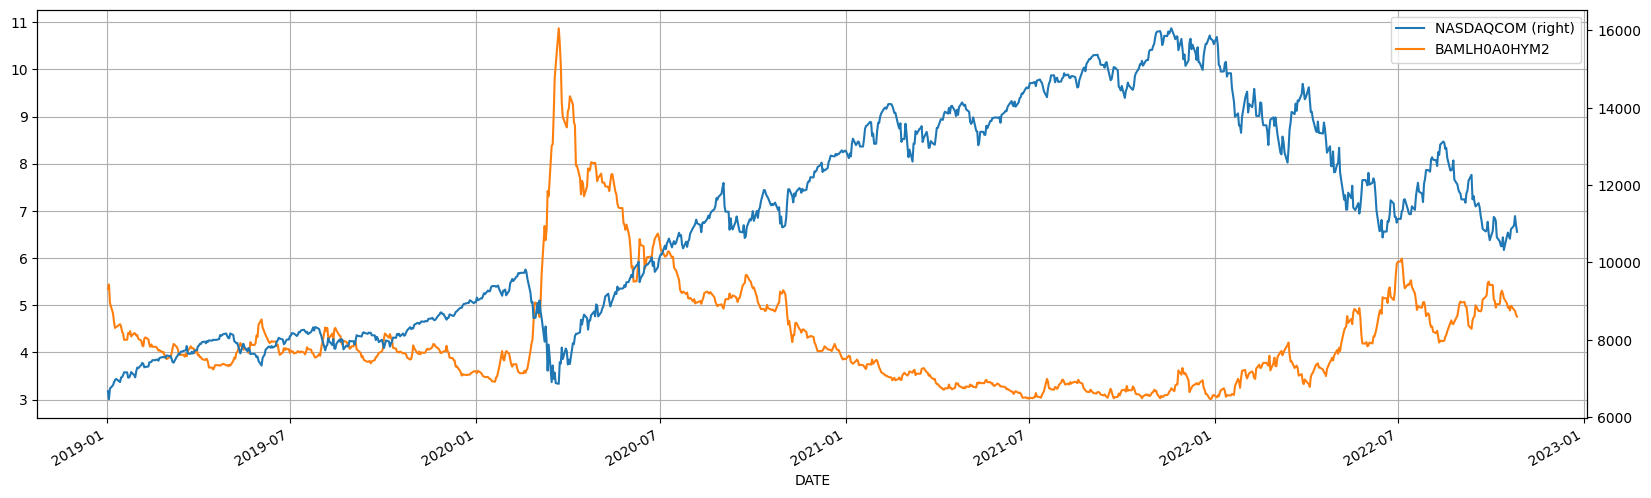

In [54]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드

df = fdr.DataReader('FRED:NASDAQCOM,BAMLH0A0HYM2',
                    start='2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')


- 주간 실업수당 청구 건수 (ICSA): 긍정적(지속↓)
- 소비자심리지수 (UMCSENT): 부정적(하락)
- 주택 판매 지수 (HSN1F): 긍정적(지속↑)
- 실업률 (UNRATE): 긍정적(지속↓)
- M2 통화량(M2): 긍정적(지속↑)
- 하이일드 채권 스프레드 (BAMLH0A0HYM2): 긍정적(지속↓)

In [ ]:
#https://nbviewer.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20FRED%20%EA%B2%BD%EA%B8%B0%20%EC%84%A0%ED%96%89%20%EC%A7%80%ED%91%9C.ipynb